In [1]:
import warnings
warnings.filterwarnings("ignore")

import os 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg   
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten

2024-08-31 18:32:50.632969: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-31 18:32:50.633104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-31 18:32:50.768537: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
batch_size = 32
img_height = 224
img_width = 224

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/cat-and-dog/dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(img_height, img_width),
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/cat-and-dog/dataset/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(img_height, img_width)
)

Found 445 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [3]:
class_names = np.array(train_ds.class_names)
print(class_names)

['cat' 'dog']


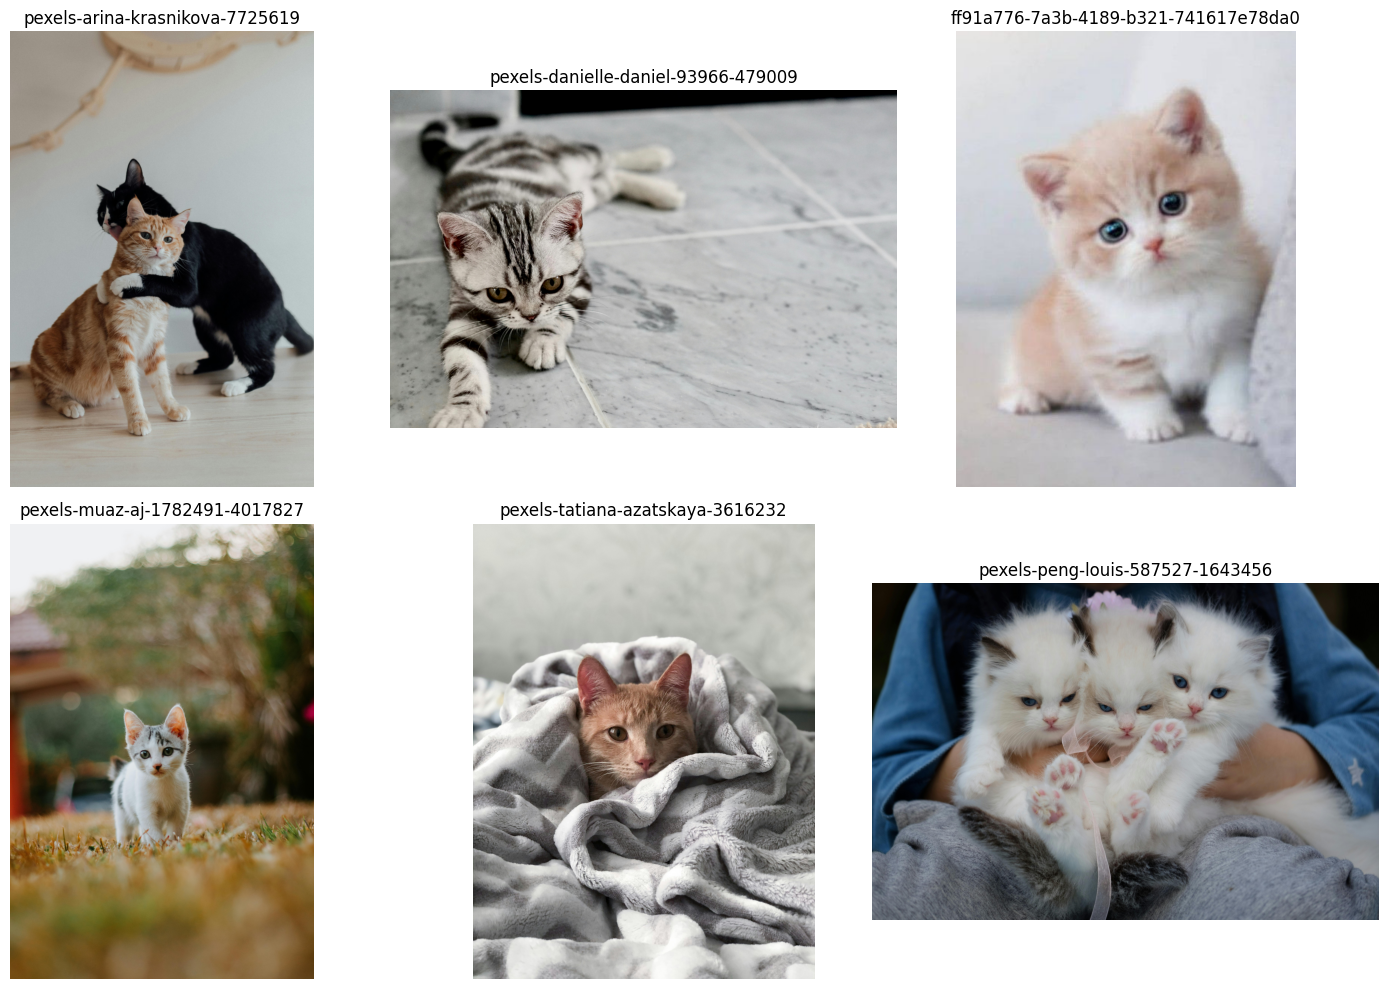

In [4]:
# Path to the directory containing images
path = "/kaggle/input/cat-and-dog/dataset/test/cat"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()


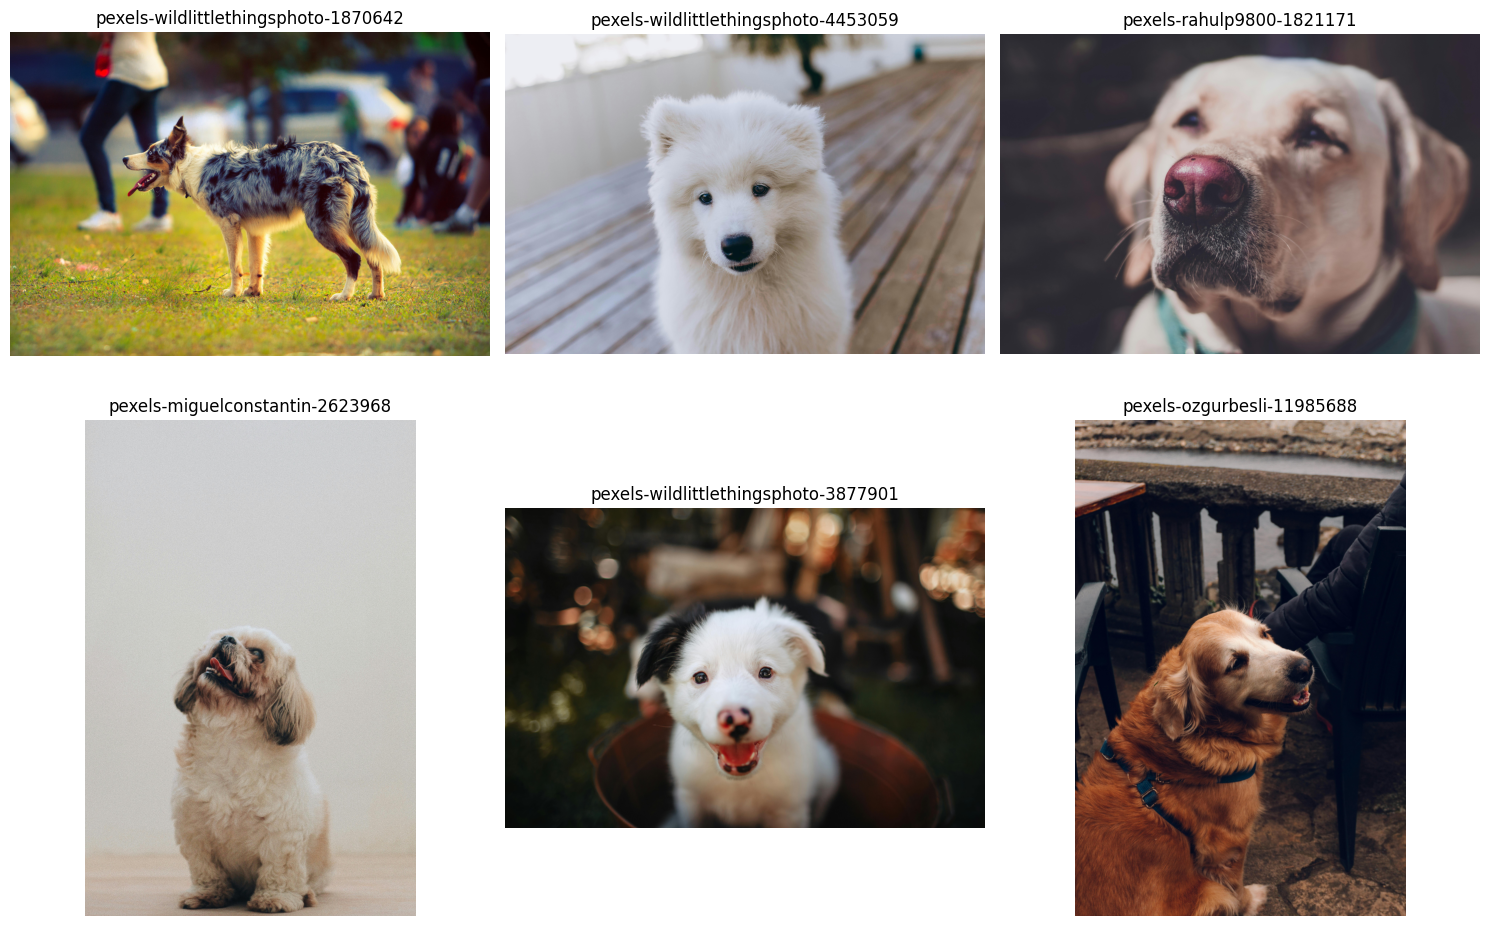

In [5]:
# Path to the directory containing images
path = "/kaggle/input/cat-and-dog/dataset/test/dog"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()


In [6]:
from tensorflow import keras

# Load the InceptionV3 model without the top layers and with ImageNet weights
base_model = keras.applications.InceptionV3(
    weights="imagenet",
    input_shape=(224, 224, 3),  
    include_top=False,
)

# Define the rest of your model
inputs = keras.Input(shape=(224, 224, 3))
scale_layer = keras.layers.Rescaling(scale=1 / 255.0)
x = scale_layer(inputs)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)  # 1 unit with sigmoid activation for binary classification
model = keras.Model(inputs, outputs)

# Fine-tuning strategy: unfreeze only the last few layers for fine-tuning
for layer in base_model.layers[:-4]:  # Freeze all layers except the last 4
    layer.trainable = False

model.summary(show_trainable=True)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_1 (InputLayer)  │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ rescaling (Rescaling)       │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ inception_v3 (Functional)   │ (None, 5, 5, 2048)    │ 21,802,784 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ global_average_pooling2d    │ (None, 2048)          │          0 │   -   │
│ (GlobalAveragePooling2D)    │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 256)           │    524,544 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout (Dropout)           │ (None, 256)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_1 (Dense)             │ (None, 1)             │        257 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 22,327,585 (85.17 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
     loss='binary_crossentropy',
    metrics=['accuracy']
)


In [8]:
epochs = 5  # You can adjust this number based on your needs

history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs
)

Epoch 1/5
 1/14 ━━━━━━━━━━━━━━━━━━━━ 5:28 25s/step - accuracy: 0.7500 - loss: 0.6852

I0000 00:00:1725129242.037830      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1725129242.095522      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8161 - loss: 0.4621   

W0000 00:00:1725129260.937097      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1725129272.160353      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14/14 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.8212 - loss: 0.4521 - val_accuracy: 0.9400 - val_loss: 0.1990
Epoch 2/5


W0000 00:00:1725129280.496419      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 802ms/step - accuracy: 0.9730 - loss: 0.0888 - val_accuracy: 0.9500 - val_loss: 0.1449
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 761ms/step - accuracy: 0.9912 - loss: 0.0424 - val_accuracy: 0.9600 - val_loss: 0.1329
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 781ms/step - accuracy: 0.9963 - loss: 0.0253 - val_accuracy: 0.9600 - val_loss: 0.1256
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 771ms/step - accuracy: 0.9977 - loss: 0.0193 - val_accuracy: 0.9500 - val_loss: 0.1240


In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9415 - loss: 0.1314
Test Loss: 0.12399876862764359
Test Accuracy: 0.949999988079071


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Actual: cat, Prediction: cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Actual: dog, Prediction: cat


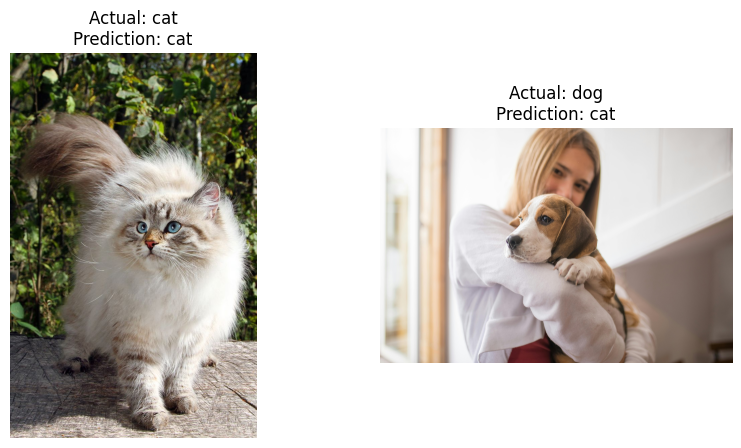

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array /= 255.0  # Rescale to [0, 1] range
    return img_array

# Function to predict the image class
def predict_image(image_path, model):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    return 'dog' if prediction > 0.5 else 'cat'

# Paths to the images
image_path_cat = '/kaggle/input/cat-and-dog/dataset/test/cat/Pure Breeds Archives - The Happy Cat Site.jpeg'
image_path_dog = '/kaggle/input/cat-and-dog/dataset/test/dog/pexels-kampus-8057575.jpeg'

# Actual labels for the images
actual_label_cat = 'cat'
actual_label_dog = 'dog'

# Predict the class for the cat image
prediction_cat = predict_image(image_path_cat, model)
print(f'Actual: {actual_label_cat}, Prediction: {prediction_cat}')

# Predict the class for the dog image
prediction_dog = predict_image(image_path_dog, model)
print(f'Actual: {actual_label_dog}, Prediction: {prediction_dog}')

# Load the images
img_cat = mpimg.imread(image_path_cat)
img_dog = mpimg.imread(image_path_dog)

# Plot the images with actual and predicted labels
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Cat image
axs[0].imshow(img_cat)
axs[0].set_title(f'Actual: {actual_label_cat}\nPrediction: {prediction_cat}')
axs[0].axis('off')

# Dog image
axs[1].imshow(img_dog)
axs[1].set_title(f'Actual: {actual_label_dog}\nPrediction: {prediction_dog}')
axs[1].axis('off')

plt.show()

**`There is clear overfitting. , I think the data is too small so i collect more data , if you have suggestions , how to reduce it pleae tell me.... Thanks `**